In [274]:
import glob
import json
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

In [275]:
! cd .. && for i in {01..25}; do cabal run advent${i} --enable-profiling -- +RTS -N -pj -s -hT ; done

Build profile: -w ghc-9.2.2 -O1
In order, the following will be built (use -v for more details):
 - advent-of-code21-0.1.0.0 (exe:advent01)  --enable-profiling (configuration changed)
Configuring executable 'advent01' for advent-of-code21-0.1.0.0..
Preprocessing executable 'advent01' for advent-of-code21-0.1.0.0..
Building executable 'advent01' for advent-of-code21-0.1.0.0..
Linking /home/neil/Programming/advent-of-code-21/dist-newstyle/build/x86_64-linux/ghc-9.2.2/advent-of-code21-0.1.0.0/x/advent01/build/advent01/advent01 ...
1521
1543
      20,426,624 bytes allocated in the heap
       1,552,136 bytes copied during GC
         412,104 bytes maximum residency (2 sample(s))
         136,760 bytes maximum slop
              62 MiB total memory in use (0 MB lost due to fragmentation)

                                     Tot time (elapsed)  Avg pause  Max pause
  Gen  0         3 colls,     3 par    0.002s   0.001s     0.0003s    0.0003s
  Gen  1         2 colls,     1 par    0.002s   0

In [316]:
! rm ../times.csv
! rm ../times_raw.csv

rm: cannot remove '../times_raw.csv': No such file or directory


In [317]:
! cd .. && for i in {01..25}; do /usr/bin/time -f "%C,%S,%E,%M" -o times.csv -a cabal run advent${i}; done

Run 'cabal update' to get the latest list of available packages.
Resolving dependencies...
Up to date
1521
1543
Up to date
2039912
1942068080
Up to date
2724524
2775870
Up to date
82440
20774
Up to date
5092
20484
Up to date
352195
1600306001288
Up to date
336721
91638945
Up to date
255
982158
Up to date
15
1134
Up to date
339537
2412013412
Up to date
1627
329
Up to date
4495
131254
Up to date
763
███  █  █  ██  █    ███   ██  ███   ██ 
█  █ █  █ █  █ █    █  █ █  █ █  █ █  █
█  █ ████ █  █ █    █  █ █    █  █ █  █
███  █  █ ████ █    ███  █    ███  ████
█ █  █  █ █  █ █    █ █  █  █ █ █  █  █
█  █ █  █ █  █ ████ █  █  ██  █  █ █  █

Up to date
2712
8336623059567
Up to date
503
2853
Up to date
852
19348959966392
Up to date
5995
3202
Up to date
2501
4935
Up to date
355
10842
Up to date
5225
18131
Up to date
734820
193170338541590
Up to date
545118
1227298136842375
Up to date
14460
41366
Up to date
91398299697996
41171183141291
Up to date
435


In [318]:
! cd .. && for i in {01..25}; do /usr/bin/time -f "%C,%S,%E,%M" -o times_raw.csv -a advent${i}; done

1521
1543
2039912
1942068080
2724524
2775870
82440
20774
5092
20484
352195
1600306001288
336721
91638945
255
982158
15
1134
339537
2412013412
1627
329
4495
131254
763
███  █  █  ██  █    ███   ██  ███   ██ 
█  █ █  █ █  █ █    █  █ █  █ █  █ █  █
█  █ ████ █  █ █    █  █ █    █  █ █  █
███  █  █ ████ █    ███  █    ███  ████
█ █  █  █ █  █ █    █ █  █  █ █ █  █  █
█  █ █  █ █  █ ████ █  █  ██  █  █ █  █

2712
8336623059567
503
2853
852
19348959966392
5995
3202
2501
4935
355
10842
5225
18131
734820
193170338541590
545118
1227298136842375
14460
41366
91398299697996
41171183141291
435


In [319]:
!mv ../*prof .

mv: cannot stat '../*prof': No such file or directory


In [320]:
!mv ../times.csv .

In [321]:
!mv ../times_raw.csv .

In [322]:
!mv ../*hp .

mv: cannot stat '../*hp': No such file or directory


In [323]:
! for f in *hp ; do hp2ps ${f} ; done

/bin/bash: -c: line 1: syntax error near unexpected token `;'
/bin/bash: -c: line 1: ` for f in *hp ; do hp2ps $<_io.TextIOWrapper name='advent24.prof' mode='r' encoding='UTF-8'> ; done'


In [324]:
len(glob.glob('*prof'))

25

In [325]:
profs = []
for fn in glob.glob('*prof'):
    with open(fn) as f:
        j = json.load(f)
        prof = {}
        for n in 'program total_time total_alloc total_ticks initial_capabilities'.split():
            prof[n] = j[n]
        profs.append(prof)
profs

[{'program': 'advent13',
  'total_time': 0.03,
  'total_alloc': 4493632,
  'total_ticks': 96,
  'initial_capabilities': 12},
 {'program': 'advent10',
  'total_time': 0.02,
  'total_alloc': 2383248,
  'total_ticks': 60,
  'initial_capabilities': 12},
 {'program': 'advent03',
  'total_time': 0.05,
  'total_alloc': 8298128,
  'total_ticks': 168,
  'initial_capabilities': 12},
 {'program': 'advent07',
  'total_time': 0.04,
  'total_alloc': 5589544,
  'total_ticks': 132,
  'initial_capabilities': 12},
 {'program': 'advent20',
  'total_time': 35.11,
  'total_alloc': 3090735840,
  'total_ticks': 119712,
  'initial_capabilities': 12},
 {'program': 'advent19',
  'total_time': 21.74,
  'total_alloc': 2623652352,
  'total_ticks': 74148,
  'initial_capabilities': 12},
 {'program': 'advent01',
  'total_time': 0.06,
  'total_alloc': 12058592,
  'total_ticks': 192,
  'initial_capabilities': 12},
 {'program': 'advent18',
  'total_time': 1.73,
  'total_alloc': 588717288,
  'total_ticks': 5916,
  'initi

In [326]:
performance = pd.DataFrame(profs).set_index('program').sort_index()
performance

total_time  total_alloc  total_ticks  initial_capabilities
program                                                             
advent01        0.06     12058592          192                    12
advent02        0.02      1818928           72                    12
advent03        0.05      8298128          168                    12
advent04        0.19     54628920          636                    12
advent05        2.26    434487576         7692                    12
advent06        0.02      2507624           72                    12
advent07        0.04      5589544          132                    12
advent08        6.57   2499222744        22404                    12
advent09        0.01       469984           36                    12
advent10        0.02      2383248           60                    12
advent11        0.12     39102056          396                    12
advent12        6.69    722598152        22800                    12
advent13        0.03      4493632           96                    12
advent14        0.05     15471000          180                    12
advent15       13.51   2458599000        46080                    12
advent16        0.05      8613496          180                    12
advent17        0.20     88071992          672                    12
advent18        1.73    588717288         5916                    12
advent19       21.74   2623652352        74148                    12
advent20       35.11   3090735840       119712                    12
advent21        9.43   2400838008        32160                    12
advent22        5.54   1384180736        18876                    12
advent23      172.99  38150694448       589896                    12
advent24      340.53  66538931736      1161240                    12
advent25       25.72   1910248008        87696                    12

<AxesSubplot:xlabel='program'>

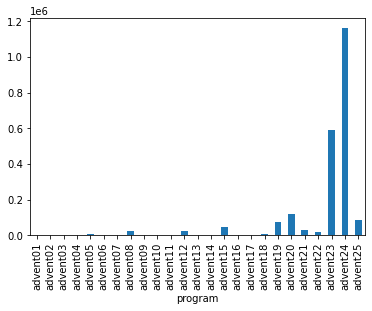

In [327]:
performance.total_ticks.plot.bar()

<AxesSubplot:xlabel='program'>

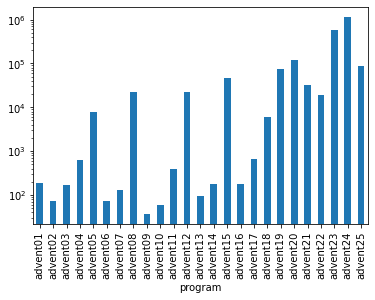

In [328]:
performance.total_ticks.plot.bar(logy=True)

<AxesSubplot:xlabel='program'>

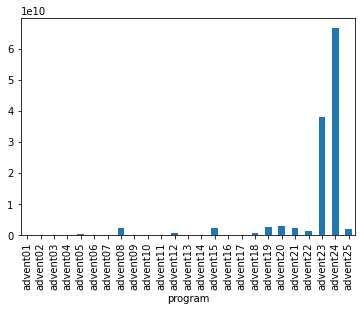

In [329]:
performance.total_alloc.plot.bar()

<AxesSubplot:xlabel='program'>

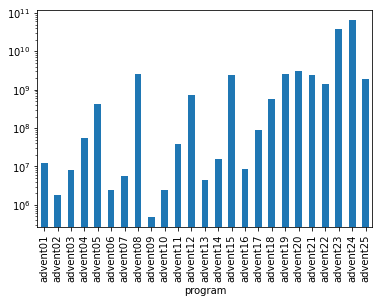

In [330]:
performance.total_alloc.plot.bar(logy=True)

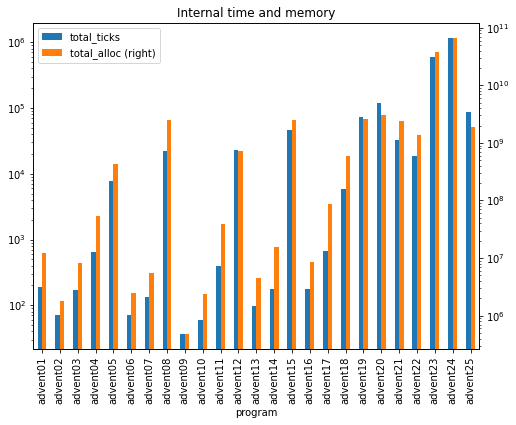

In [331]:
performance[['total_ticks', 'total_alloc']].plot.bar(
    logy=True, secondary_y=['total_alloc'], 
    figsize=(8, 6), title="Internal time and memory")
plt.savefig('internal_time_and_memory_log.png')

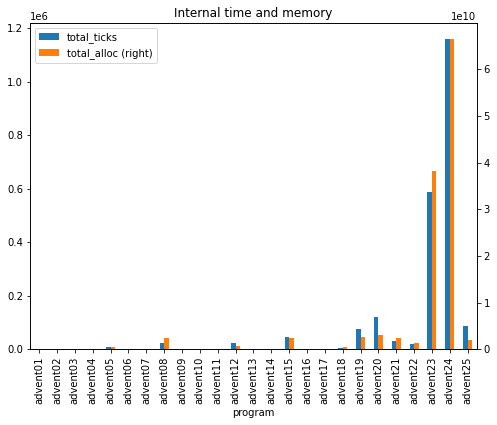

In [332]:
performance[['total_ticks', 'total_alloc']].plot.bar(
    logy=False, secondary_y=['total_alloc'], 
    figsize=(8, 6), title="Internal time and memory")
plt.savefig('internal_time_and_memory_linear.png')

In [333]:
# times = pd.read_csv('times.csv', 
#                     names=['program', 'system', 'elapsed', 'memory'], 
#                     index_col='program')
# times.index = times.index.str.slice(start=len('cabal run '))
# times.elapsed = pd.to_numeric(times.elapsed.str.slice(start=2))
# times

In [334]:
times = pd.read_csv('times_raw.csv', 
                    names=['program', 'system', 'elapsed', 'memory'], 
                    index_col='program')
times.elapsed = pd.to_numeric(times.elapsed.str.slice(start=2))
times

system  elapsed  memory
program                          
advent01    0.01     0.02   10212
advent02    0.00     0.01    7876
advent03    0.00     0.01   10760
advent04    0.02     0.05   14236
advent05    0.07     0.47   49372
advent06    0.00     0.01    7948
advent07    0.00     0.01   10164
advent08    0.21     0.98   12252
advent09    0.00     0.01    6644
advent10    0.00     0.01    7456
advent11    0.01     0.04   11272
advent12    0.11     1.15   61132
advent13    0.00     0.01   11504
advent14    0.00     0.02   11020
advent15    0.18     1.39   53240
advent16    0.01     0.01   12128
advent17    0.00     0.02   11604
advent18    0.03     0.17   11812
advent19    0.15     3.88   12524
advent20    0.34     2.49  207144
advent21    0.16     1.03   22020
advent22    0.14     0.76   12508
advent23    2.29    27.19   98824
advent24    4.00    27.92   12432
advent25    0.19     4.21   13748

In [335]:
times.dtypes

system     float64
elapsed    float64
memory       int64
dtype: object

In [336]:
times.describe()

system    elapsed         memory
count  25.000000  25.000000      25.000000
mean    0.316800   2.874800   27993.280000
std     0.890916   7.520247   43271.608039
min     0.000000   0.010000    6644.000000
25%     0.000000   0.010000   10760.000000
50%     0.020000   0.050000   12128.000000
75%     0.160000   1.150000   14236.000000
max     4.000000  27.920000  207144.000000

In [337]:
performance = performance.merge(times, left_index=True, right_index=True)
# performance.drop(index='advent15loop', inplace=True)
performance

total_time  total_alloc  total_ticks  initial_capabilities  system  \
program                                                                        
advent01        0.06     12058592          192                    12    0.01   
advent02        0.02      1818928           72                    12    0.00   
advent03        0.05      8298128          168                    12    0.00   
advent04        0.19     54628920          636                    12    0.02   
advent05        2.26    434487576         7692                    12    0.07   
advent06        0.02      2507624           72                    12    0.00   
advent07        0.04      5589544          132                    12    0.00   
advent08        6.57   2499222744        22404                    12    0.21   
advent09        0.01       469984           36                    12    0.00   
advent10        0.02      2383248           60                    12    0.00   
advent11        0.12     39102056          396                    12    0.01   
advent12        6.69    722598152        22800                    12    0.11   
advent13        0.03      4493632           96                    12    0.00   
advent14        0.05     15471000          180                    12    0.00   
advent15       13.51   2458599000        46080                    12    0.18   
advent16        0.05      8613496          180                    12    0.01   
advent17        0.20     88071992          672                    12    0.00   
advent18        1.73    588717288         5916                    12    0.03   
advent19       21.74   2623652352        74148                    12    0.15   
advent20       35.11   3090735840       119712                    12    0.34   
advent21        9.43   2400838008        32160                    12    0.16   
advent22        5.54   1384180736        18876                    12    0.14   
advent23      172.99  38150694448       589896                    12    2.29   
advent24      340.53  66538931736      1161240                    12    4.00   
advent25       25.72   1910248008        87696                    12    0.19   

          elapsed  memory  
program                    
advent01     0.02   10212  
advent02     0.01    7876  
advent03     0.01   10760  
advent04     0.05   14236  
advent05     0.47   49372  
advent06     0.01    7948  
advent07     0.01   10164  
advent08     0.98   12252  
advent09     0.01    6644  
advent10     0.01    7456  
advent11     0.04   11272  
advent12     1.15   61132  
advent13     0.01   11504  
advent14     0.02   11020  
advent15     1.39   53240  
advent16     0.01   12128  
advent17     0.02   11604  
advent18     0.17   11812  
advent19     3.88   12524  
advent20     2.49  207144  
advent21     1.03   22020  
advent22     0.76   12508  
advent23    27.19   98824  
advent24    27.92   12432  
advent25     4.21   13748

In [338]:
performance.columns

Index(['total_time', 'total_alloc', 'total_ticks', 'initial_capabilities',
       'system', 'elapsed', 'memory'],
      dtype='object')

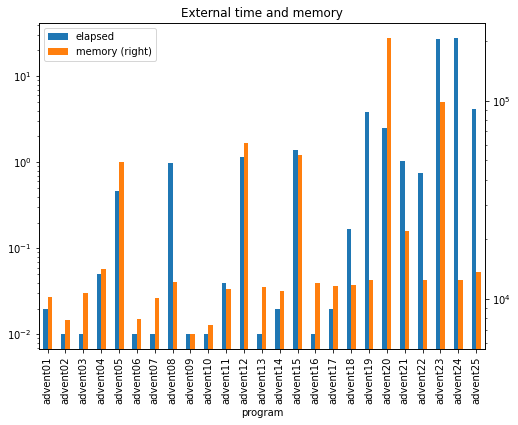

In [339]:
# performance[['total_ticks', 'elapsed']].plot.bar(logy=True)
performance[['elapsed', 'memory']].plot.bar(
    logy=True, secondary_y=['memory'], 
    figsize=(8, 6), title="External time and memory")
plt.savefig('external_time_and_memory_log.png')

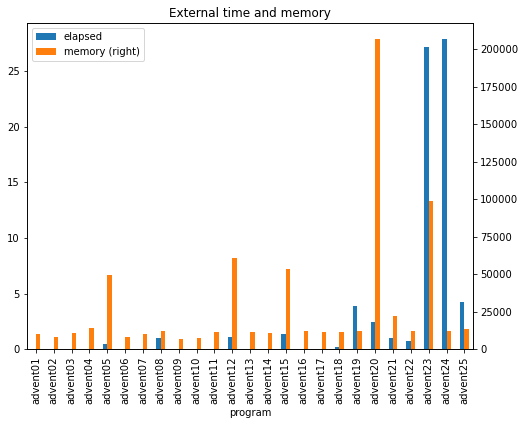

In [340]:
# performance[['total_ticks', 'elapsed']].plot.bar(logy=True)
performance[['elapsed', 'memory']].plot.bar(
    logy=False, secondary_y=['memory'], 
    figsize=(8, 6), title="External time and memory")
plt.savefig('external_time_and_memory_linear.png')

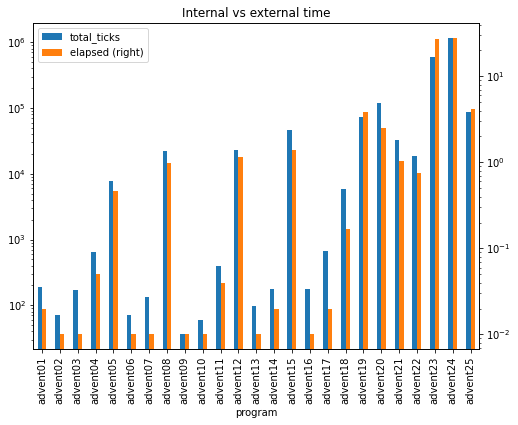

In [341]:
# performance[['total_ticks', 'elapsed']].plot.bar(logy=True)
performance[['total_ticks', 'elapsed']].plot.bar(
    logy=True, secondary_y=['elapsed'], 
    figsize=(8, 6), title="Internal vs external time")
plt.savefig('internal_external_time.png')

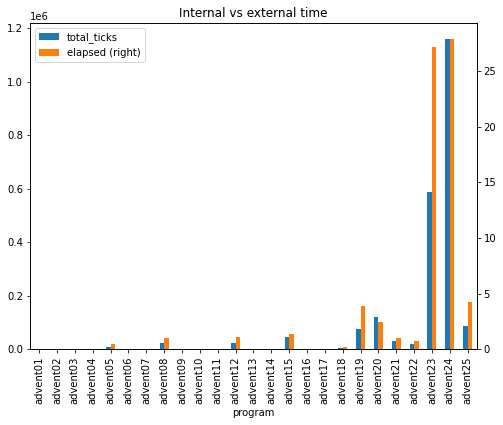

In [357]:
# performance[['total_ticks', 'elapsed']].plot.bar(logy=True)
performance[['total_ticks', 'elapsed']].plot.bar(
    logy=False, secondary_y=['elapsed'], 
    figsize=(8, 6), title="Internal vs external time")
plt.savefig('internal_external_time_linear.png')

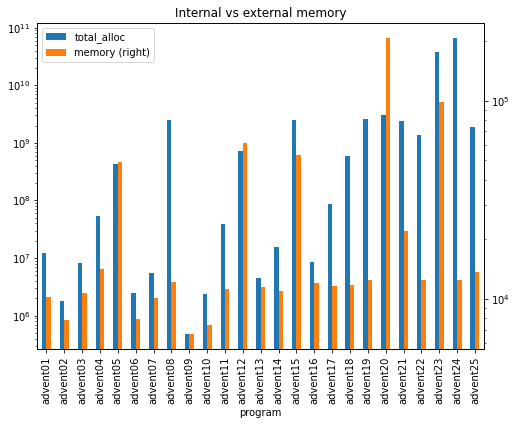

In [342]:
# performance[['total_ticks', 'elapsed']].plot.bar(logy=True)
performance[['total_alloc', 'memory']].plot.bar(
    logy=True, secondary_y=['memory'], 
    figsize=(8, 6), title="Internal vs external memory")
plt.savefig('internal_external_memory_log.png')

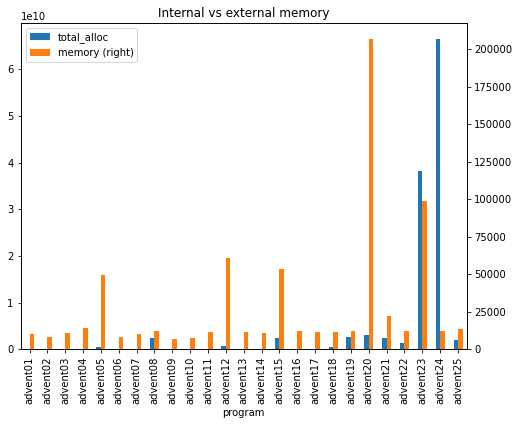

In [343]:
# performance[['total_ticks', 'elapsed']].plot.bar(logy=True)
performance[['total_alloc', 'memory']].plot.bar(
    logy=False, secondary_y=['memory'], 
    figsize=(8, 6), title="Internal vs external memory")
plt.savefig('internal_external_memory_linear.png')

In [344]:
# performance['elapsed_adj'] = performance['elapsed'] - 0.28
# performance

In [345]:
# performance[['total_time', 'elapsed_adj']].plot.bar(logy=True)

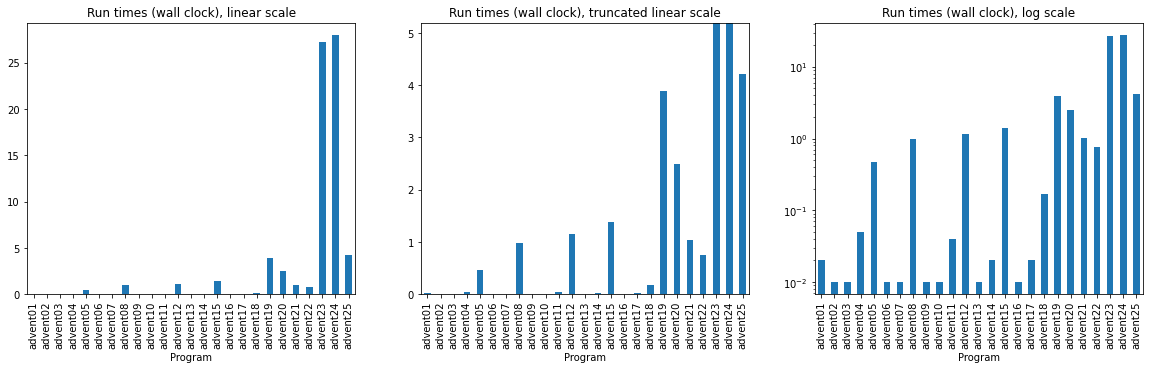

In [356]:
fig, ax = plt.subplots(ncols=3, figsize=(20,5))

performance['elapsed'].plot.bar(ax=ax[2],
    logy=True, 
    title="Run times (wall clock), log scale",
#     figsize=(10,8)
    )
ax[2].set_xlabel('Program')

performance['elapsed'].plot.bar(ax=ax[0],
    logy=False, 
    title="Run times (wall clock), linear scale",
#     figsize=(10,8)
    )
ax[0].set_xlabel('Program')

performance['elapsed'].plot.bar(ax=ax[1],
    logy=False, 
    ylim=(0, 5.2),
    title="Run times (wall clock), truncated linear scale",
#     figsize=(10,8)
    )
ax[1].set_xlabel('Program')

plt.savefig('run_times_combined.png')

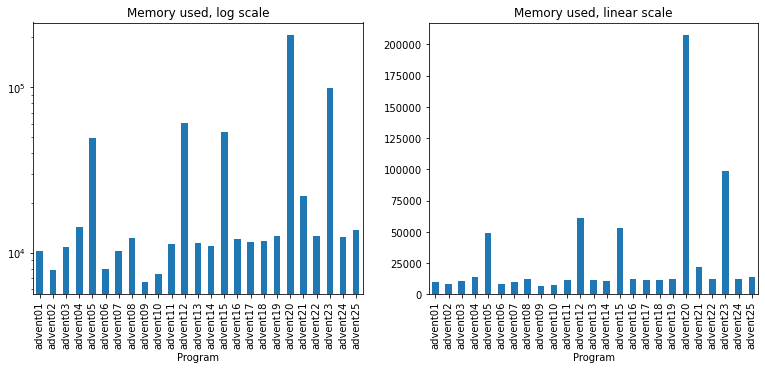

In [347]:
fig, ax = plt.subplots(ncols=2, figsize=(13,5))

performance['memory'].plot.bar(ax=ax[0],
    logy=True, 
    title="Memory used, log scale",
#     figsize=(10,8)
    )
ax[0].set_xlabel('Program')

performance['memory'].plot.bar(ax=ax[1],
    logy=False, 
    title="Memory used, linear scale",
#     figsize=(10,8)
    )
ax[1].set_xlabel('Program')

plt.savefig('memory_combined.png')

In [348]:
# ax = performance['elapsed_adj'].plot.bar(logy=False, 
#     title="Run times (wall clock), linear scale",
#     figsize=(10,8))
# ax.set_xlabel('Program')
# plt.savefig('run_times_linear.png')

In [349]:
performance.columns

Index(['total_time', 'total_alloc', 'total_ticks', 'initial_capabilities',
       'system', 'elapsed', 'memory'],
      dtype='object')

<AxesSubplot:xlabel='program'>

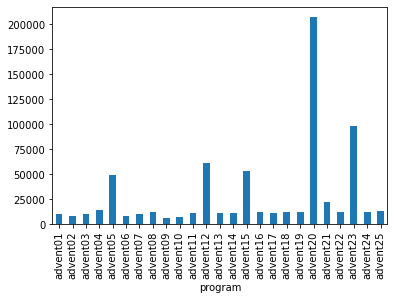

In [350]:
performance['memory'].plot.bar()

<AxesSubplot:xlabel='elapsed', ylabel='total_alloc'>

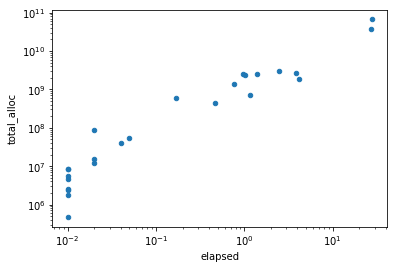

In [351]:
performance.plot.scatter('elapsed', 'total_alloc', logx=True, logy=True)

<AxesSubplot:xlabel='memory', ylabel='total_alloc'>

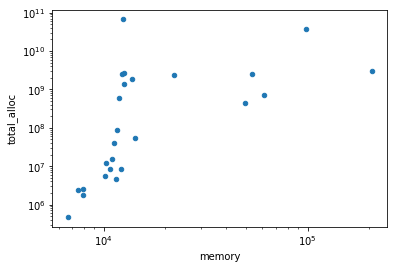

In [352]:
performance.plot.scatter('memory', 'total_alloc', logx=True, logy=True)

<AxesSubplot:xlabel='elapsed', ylabel='total_ticks'>

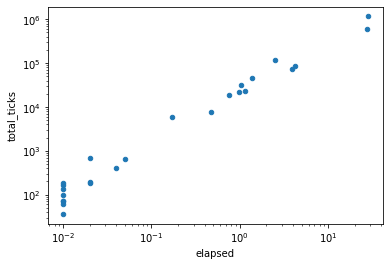

In [353]:
performance.plot.scatter('elapsed', 'total_ticks', logx=True, logy=True)

In [354]:
performance[['total_alloc', 'memory', 'elapsed']].to_csv('performance.csv')

In [355]:
print(performance[['total_alloc', 'elapsed', 'memory']].to_markdown(floatfmt=['0.0f', '0.0f', '.2f', '0.0f']))

| program   |   total_alloc |   elapsed |   memory |
|:----------|--------------:|----------:|---------:|
| advent01  |      12058592 |      0.02 |    10212 |
| advent02  |       1818928 |      0.01 |     7876 |
| advent03  |       8298128 |      0.01 |    10760 |
| advent04  |      54628920 |      0.05 |    14236 |
| advent05  |     434487576 |      0.47 |    49372 |
| advent06  |       2507624 |      0.01 |     7948 |
| advent07  |       5589544 |      0.01 |    10164 |
| advent08  |    2499222744 |      0.98 |    12252 |
| advent09  |        469984 |      0.01 |     6644 |
| advent10  |       2383248 |      0.01 |     7456 |
| advent11  |      39102056 |      0.04 |    11272 |
| advent12  |     722598152 |      1.15 |    61132 |
| advent13  |       4493632 |      0.01 |    11504 |
| advent14  |      15471000 |      0.02 |    11020 |
| advent15  |    2458599000 |      1.39 |    53240 |
| advent16  |       8613496 |      0.01 |    12128 |
| advent17  |      88071992 |      0.02 |    1